
# 🏠 Delhi Housing Price Prediction – Advanced EDA & Modeling

---

## 📌 Sections in This Notebook

1. Descriptive Statistics with Findings  
2. Univariate, Bivariate & Multivariate Analysis (with Inferences)  
3. Feature Engineering & Visualization of Changes  
4. Preprocessing (Multiple Imputation & Encoding Options)  
5. Linear Regression Assumptions Check  
6. Modeling (Linear, Decision Tree, Random Forest)  
7. Feature Importance (All Methods)  
8. Feature Selection Techniques  
9. Hyperparameter Tuning (Manual + GridSearchCV)  
10. Final Model Comparison  

---


In [159]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [10]:

df = pd.read_csv('Indian_housing_Delhi_data.csv')
df.head(15)


,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
5,3 BHK Apartment,750 sq ft,DLF Farms,Delhi,28.488153,77.156975,11000,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,Well designed 3 bhk multistorey apartment is a...,No Deposit,Semi-Furnished
6,3 BHK Independent Floor,"1,300 sq ft",laxmi nagar,Delhi,28.635509,77.269661,20000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 3 bhk builder floor situated in laxmi...,No Deposit,Furnished
7,3 BHK Independent Floor,"1,200 sq ft",Swasthya Vihar,Delhi,28.641640,77.284027,35000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Well designed 3 bhk builder floor is available...,No Deposit,Furnished
8,3 BHK Independent House,"1,100 sq ft",Janakpuri,Delhi,28.621193,77.091026,39000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 3 bhk independent house is availabl...,No Deposit,Semi-Furnished
9,4 BHK Independent Floor,"2,500 sq ft",Pitampura,Delhi,28.696100,77.125694,90000,INR,4.0,NaN,NaN,NaN,Posted 2 months ago,A spacious 4 bhk builder floor is available fo...,No Deposit,Semi-Furnished


In [12]:
df.shape

(5000, 16)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [24]:
def preproc_str(s):
    return int(s.strip().replace(',', '').replace('No Deposit','0').replace(' sq ft',''))

In [28]:
preproc_str('1,020 sq ft')
preproc_str('No Deposit')

0

In [30]:
df.house_size = df.house_size.apply(preproc_str)

In [32]:
df.SecurityDeposit = df.SecurityDeposit.apply(preproc_str)

In [34]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",0,Furnished
1,1 RK Studio Apartment,400,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,0,Furnished
2,2 BHK Independent Floor,500,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",0,Semi-Furnished
3,3 BHK Independent House,1020,Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,0,Furnished
4,2 BHK Apartment,810,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,0,Unfurnished


In [40]:
# oe = OrdinalEncoder(encoded_missing_value = df.Status.mode())
ohe = OneHotEncoder()

In [72]:
ohe.fit(df[['Status']])

OneHotEncoder()

In [74]:
# when we have less categories - we called it as low cardinal data
ohe.categories_

[array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)]

In [113]:
transformed_status = pd.DataFrame(ohe.transform(df[["Status"]],).toarray(),columns = ['Furnished', 'Semi-Furnished', 'Unfurnished'])

In [115]:
# transformed_status added to the base dataframe
df_trans1 = pd.concat([df,transformed_status],axis = 1)

In [117]:
df_trans2 = df_trans1.drop(['Status','status_transformed','verificationDate','description'],axis = 1)

In [121]:
(df_trans2.isnull().sum()/df_trans2.shape[0])*100

house_type           0.00
house_size           0.00
location             0.00
city                 0.00
latitude             0.00
longitude            0.00
price                0.00
currency             0.00
numBathrooms         0.50
numBalconies        45.26
isNegotiable        96.42
priceSqFt          100.00
SecurityDeposit      0.00
Furnished            0.00
Semi-Furnished       0.00
Unfurnished          0.00
dtype: float64

In [123]:

df_trans3 = df_trans2.drop(['priceSqFt','isNegotiable'],axis = 1)

In [127]:
(df_trans3.isnull().sum()/df_trans3.shape[0])*100

house_type          0.00
house_size          0.00
location            0.00
city                0.00
latitude            0.00
longitude           0.00
price               0.00
currency            0.00
numBathrooms        0.50
numBalconies       45.26
SecurityDeposit     0.00
Furnished           0.00
Semi-Furnished      0.00
Unfurnished         0.00
dtype: float64

In [132]:
df_trans3.numBalconies.value_counts()

numBalconies
2.0    2187
1.0     376
3.0     110
4.0      57
5.0       3
6.0       3
8.0       1
Name: count, dtype: int64

In [163]:
# Option 1: SimpleImputer (Used)
imputer = SimpleImputer(strategy='median')
df_trans3['num_balconies'] = imputer.fit_transform(df_trans3[["numBalconies"]])

df_trans3['num_balconies'].isnull().sum()
df_trans4 = df_trans3.drop(['num_balconies','numBalconies','currency','latitude','longitude','city'],axis = 1)
# Option 2: KNNImputer (Commented Alternative)
# knn_imputer = KNNImputer(n_neighbors=5)
# df[num_cols] = knn_imputer.fit_transform(df[num_cols])

In [165]:
df_trans4

,house_type,house_size,location,price,numBathrooms,SecurityDeposit,Furnished,Semi-Furnished,Unfurnished
0,1 RK Studio Apartment,400,Kalkaji,22000,1.0,0,1.0,0.0,0.0
1,1 RK Studio Apartment,400,Mansarover Garden,20000,1.0,0,1.0,0.0,0.0
2,2 BHK Independent Floor,500,Uttam Nagar,8500,1.0,0,0.0,1.0,0.0
3,3 BHK Independent House,1020,Model Town,48000,3.0,0,1.0,0.0,0.0
4,2 BHK Apartment,810,Sector 13 Rohini,20000,2.0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4995,4 BHK Villa,5896,Sunder Nagar,1022001,4.0,4010102,0.0,0.0,1.0
4996,5 BHK Independent House,6521,Sunder Nagar,1549181,4.0,5401015,0.0,0.0,1.0
4997,3 BHK Independent Floor,1855,New Friends Colony,301012,3.0,1818181,0.0,0.0,1.0
4998,3 BHK Independent Floor,2856,New Friends Colony,301011,3.0,1010110,0.0,0.0,1.0


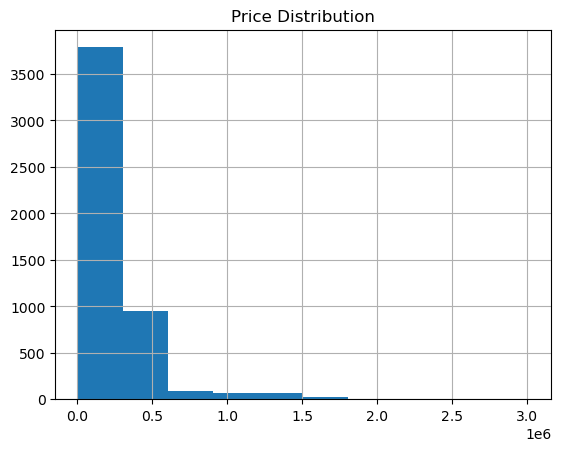

In [153]:
df_trans4['price'].hist()
plt.title("Price Distribution")
plt.show()

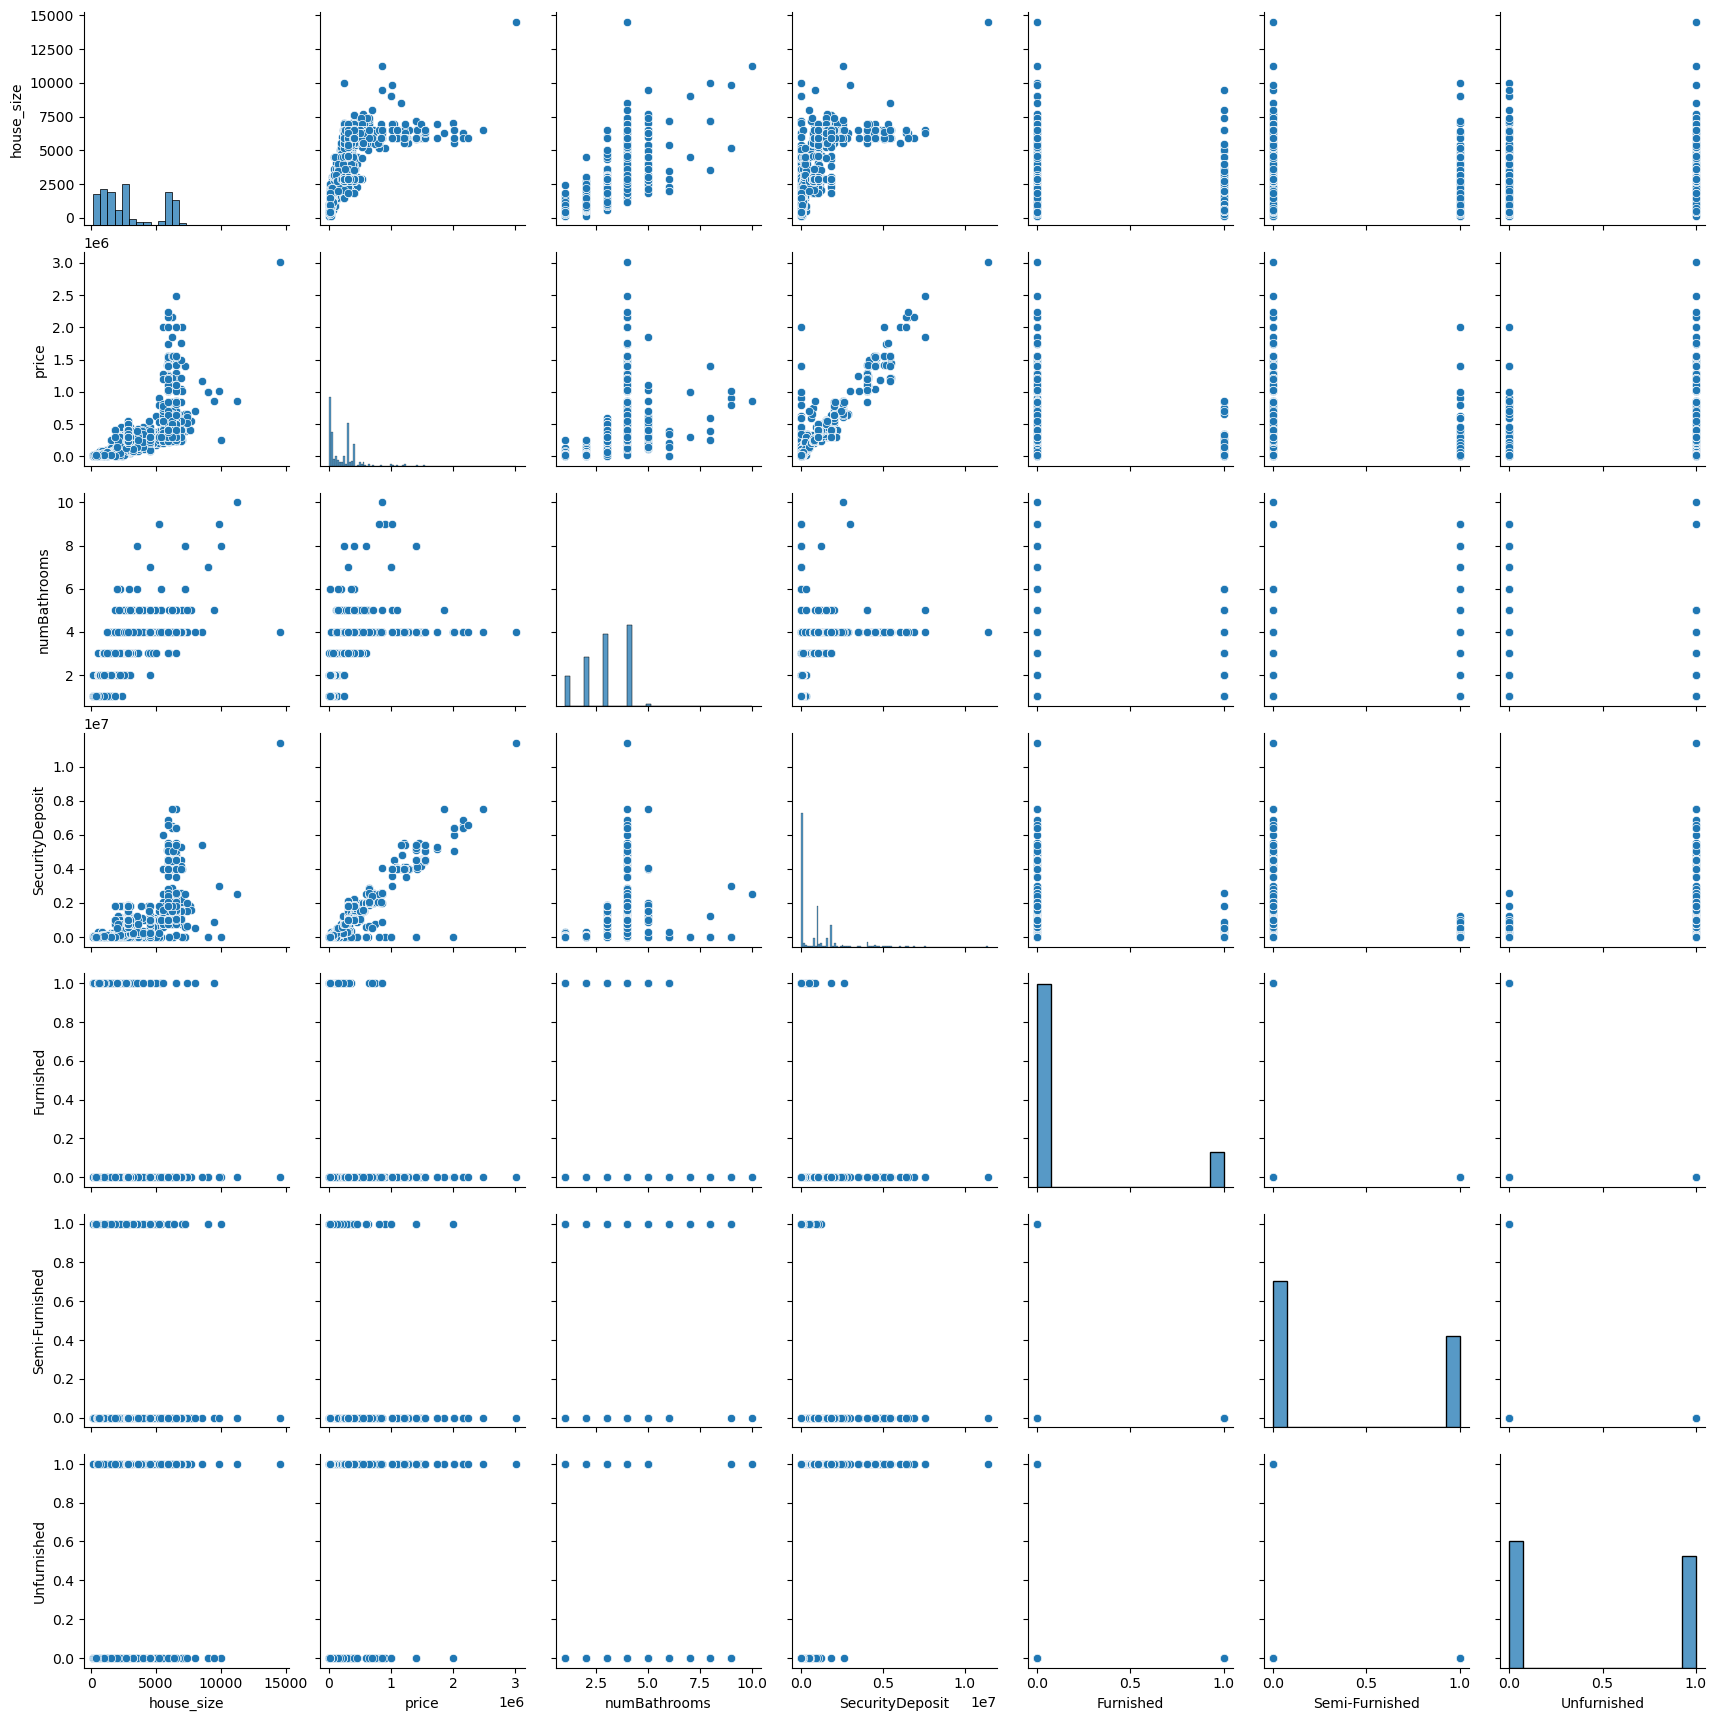

In [161]:
sns.pairplot(df_trans4)

<Axes: xlabel='location', ylabel='price'>

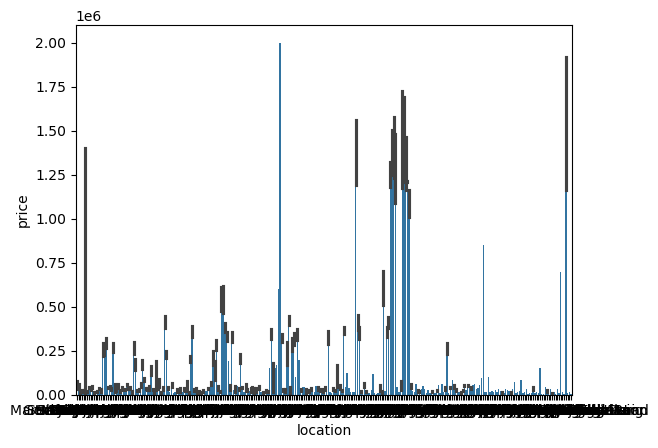

In [179]:
sns.barplot(data = df_trans4,x = 'location',y='price')

In [184]:
pd.get_dummies(df_trans4,dtype = 'int')

,house_size,price,numBathrooms,SecurityDeposit,Furnished,Semi-Furnished,Unfurnished,house_type_1 BHK Apartment,house_type_1 BHK Independent Floor,house_type_1 BHK Independent House,...,location_Yojna Vihar,location_Zone L Dwarka,location_dda flat,location_dwarka sector 12,location_dwarka sector 17,location_i p extension patparganj,location_laxmi nagar,location_masoodpur,location_mayur vihar phase 1,location_vikaspuri
0,400,22000,1.0,0,1.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,400,20000,1.0,0,1.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,500,8500,1.0,0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1020,48000,3.0,0,1.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,810,20000,2.0,0,0.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5896,1022001,4.0,4010102,0.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,6521,1549181,4.0,5401015,0.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,1855,301012,3.0,1818181,0.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,2856,301011,3.0,1010110,0.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

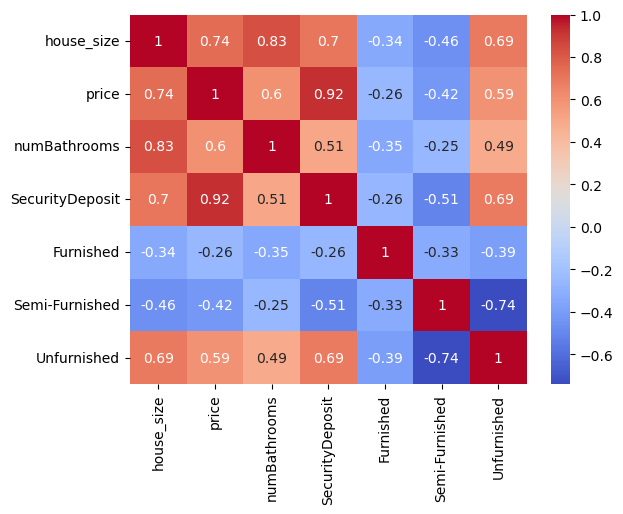

In [196]:
sns.heatmap(df_trans4[[ 'house_size', 'price', 'numBathrooms',
       'SecurityDeposit', 'Furnished', 'Semi-Furnished', 'Unfurnished']].corr(),annot=True, cmap='coolwarm')

In [223]:
df_trans4.isnull().sum()

house_type          0
house_size          0
location            0
price               0
numBathrooms       25
SecurityDeposit     0
Furnished           0
Semi-Furnished      0
Unfurnished         0
dtype: int64

In [225]:
X = df_trans4[[ 'house_size',
       'SecurityDeposit', 'Furnished', 'Semi-Furnished', 'Unfurnished']]
y = df_trans4['price']

In [227]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


SecurityDeposit    0.674506
house_size         0.323544
Semi-Furnished     0.000821
Unfurnished        0.000613
Furnished          0.000516
dtype: float64

In [229]:
lr = LinearRegression()

In [208]:
X_train,y_train,X_test, y_test = train_test_split(X,y,random_state=2,test_size = 0.2)

In [231]:
X_train,X_test,y_train, y_test = train_test_split(X,y,random_state = 2, test_size = 0.2)

In [233]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((4000, 5), (4000,), (1000, 5), (1000,))

In [239]:
lr.fit(X_train,y_train)

lr.coef_

array([ 3.08844974e+01,  2.35731290e-01,  2.39909294e+04,  3.35859342e+04,
       -5.75768636e+04])

In [245]:
y_pred = lr.predict(X_test)
# y_pred

In [251]:
# evaluation metrics
import numpy as np


mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r_2 = r2_score(y_test,y_pred)
print (f"mae {mae}, mse {mse}, rmse {rmse}, r2 {r_2}")

mae 60162.455330423145, mse 9308435705.800116, rmse 96480.23479345454, r2 0.8926073876099144



# 📊 Descriptive Statistics & Findings

We examine:
- Central tendency
- Dispersion
- Skewness
- Outliers
- Feature distributions


In [ ]:

desc = df.describe(include='all')
desc



### 🔎 Findings (Example Insights)
- Price appears right-skewed (luxury properties).
- house_size contains text and must be cleaned.
- priceSqFt is fully null → will be dropped.
- location has high cardinality.


# 📈 Univariate Analysis

In [ ]:

df['price'].hist()
plt.title("Price Distribution")
plt.show()



**Inference:** Price is positively skewed indicating presence of high-value outliers.


# 🔧 Feature Engineering & Cleaning

In [ ]:

df = df.drop(columns=['priceSqFt','currency','city','isNegotiable','description'], errors='ignore')

df['house_size'] = df['house_size'].str.replace(',', '', regex=True)
df['house_size'] = df['house_size'].str.extract('(\d+)').astype(float)

df['SecurityDeposit'] = df['SecurityDeposit'].replace('No Deposit', 0)
df['SecurityDeposit'] = df['SecurityDeposit'].str.extract('(\d+)').astype(float)

df.head()


In [ ]:

df['house_size'].hist()
plt.title("House Size After Cleaning")
plt.show()


# 🔁 Bivariate Analysis

In [ ]:

plt.scatter(df['house_size'], df['price'])
plt.title("House Size vs Price")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()



**Inference:** Strong positive relationship between house size and price.


# 🔗 Multivariate Analysis & Collinearity

In [ ]:

num_df = df.select_dtypes(include=np.number)

corr = num_df.corr()
corr



### Correlation Observations
- Check high correlations (>0.8).
- Potential multicollinearity among area-based variables.


In [ ]:

X_vif = num_df.drop(columns=['price'])
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

vif_data


# 🧩 Missing Value Imputation Options

In [ ]:

num_cols = df.select_dtypes(include=np.number).columns

# Option 1: SimpleImputer (Used)
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Option 2: KNNImputer (Commented Alternative)
# knn_imputer = KNNImputer(n_neighbors=5)
# df[num_cols] = knn_imputer.fit_transform(df[num_cols])

df.isnull().sum()


# 🔤 Encoding Categorical Variables

In [ ]:

df = pd.get_dummies(df, drop_first=True)

df.head()


# ⭐ Feature Importance Analysis

In [ ]:

X = df.drop('price', axis=1)
y = df['price']

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)



### Feature Importance via:
- Random Forest
- Linear Regression Coefficients
- SelectKBest
- RFE


In [ ]:

# Linear Regression Coefficients
lr = LinearRegression()
lr.fit(X, y)

coef = pd.Series(lr.coef_, index=X.columns)
coef.sort_values(ascending=False).head(10)


In [ ]:

# SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
selected_features


In [ ]:

# RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X, y)

X.columns[rfe.support_]


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 🤖 Modeling Section

In [ ]:

def evaluate(model):
    y_pred = model.predict(X_test)
    print("R2:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
evaluate(lr_model)


In [ ]:

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
evaluate(dt_model)


In [ ]:

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
evaluate(rf_model)


# 🔍 Hyperparameter Tuning

In [ ]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    cv=3,
                    scoring='r2')

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

best_model = grid.best_estimator_
evaluate(best_model)
